In [164]:
import pandas as pd

entrada = pd.read_csv("entrada.csv", index_col=0, encoding = "ISO-8859-1")

In [165]:
def lerEntrada(entrada):
    grafo = {}
    for i in entrada:
        vizinhos = []
        for j in range(1,len(entrada[i])+1):
            if entrada[str(i)][j] == 1:
                vizinhos.append(str(entrada.index[j-1]))
                
        grafo[i] = vizinhos
    return grafo

In [166]:
grafo = lerEntrada(entrada)
grafo

{'1': ['2', '3'],
 '2': ['1', '4', '5'],
 '3': ['1', '2', '5'],
 '4': ['6'],
 '5': ['2', '3', '6'],
 '6': ['4', '5', '7'],
 '7': ['6']}

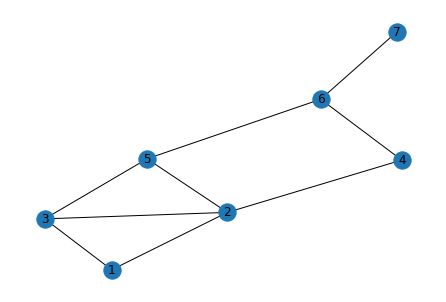

In [167]:
import networkx as nx

def mostrar(grafo):
    G = nx.Graph()

    for i in grafo:
        G.add_node(i)
        for j in grafo[i]:
            G.add_edge(i,j)

    nx.spring_layout(G, k=0.15)
    nx.draw(G, with_labels=True)

mostrar(grafo)


In [168]:
def recursivo(grafo, vertice, G, auxiliar=[]):
    auxiliar += [vertice]
    G.add_node(vertice)
    print(vertice)

    for vizinho in grafo[vertice]:
        if vizinho not in auxiliar:
            G.add_edge(vertice, vizinho)
            recursivo(grafo, vizinho, G, auxiliar)

    return G


5
2
1
3
4
6
7


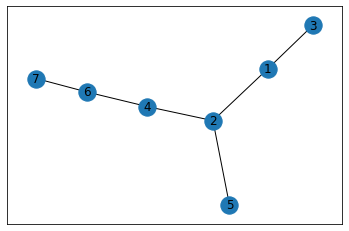

In [169]:
G = nx.Graph()
vertice_inicial = '5'

recursivo(grafo, vertice_inicial, G)

arvore = nx.spring_layout(G)
nx.draw_networkx(G, arvore, with_labels=True)